# Exercise 02 Ensemble Learning II

<span style="color:red">**Due date for submission: January 22, 2025 at 23:59**</span>

## Pedagogy

This notebook contains both theoretical explanations and executable cells to execute your code.

When you see the <span style="color:red">**[TBC]**</span> (To Be Completed) sign, it means that you need to perform an action else besides executing the cells of code that already exist. These actions can be:
- Complete the code with proper comments
- Respond to a question
- Write an analysis
- etc.

### Import libraries

In [10]:
# import all libraries used in this notebook here
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import classification_report, f1_score, mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, StackingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [11]:
# suppress all warnings
warnings.filterwarnings("ignore")

## Part 1. AdaBoost Classifier

In this part, we will using AdaBoost algorithm to build a classifier with a toy dataset.

We will ececute the following steps:

- Load and explore dataset
- Train test split
- Build an AdaBoost classifier with default hyper-parameters
- Evaluation the classifier using the test dataset
- Obtain the byproduct feature importance
- Test the effects of hyper-parameters on performance

### 1.1 Load dataset

We will use a toy dataset, the [wine recognition dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset), provided by `scikit-learn`.

There are 13 feature variables in the dataset, which are the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators.

There are one target variable, with 3 unique categories, representing the 3 different cultivators.

There are 178 instances in the dataset.

We will use this dataset to build a multi-class classifier with AdaBoost.

Use `sklearn.dataset.load_wine()` to get this dataset.

In [12]:
# load dataset
feature_df, target_df = datasets.load_wine(
    return_X_y = True, # If True, returns (data.data, data.target) instead of a Bunch object.
    as_frame = True # If True, the data is a pandas DataFrame including columns with appropriate dtypes (numeric).
)

In [13]:
# display the first five rows of the features
feature_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [14]:
# display the unique values of the target variable
target_df.unique()

array([0, 1, 2])

### 1.2 Train test split

We will split the whole dataset into two parts: the training and test dataset.
- 70% for training
- 30% for test

Use `sklearn.model_selection.train_test_split()` to do this.

In [15]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    feature_df.values, # call `.values` to convert the feature from pd.DataFrame to np.array
    target_df.values, # ca;; `.values` to convert the target from pd.Series to np.array
    train_size = 0.7, # 70% for training, 30% for test
    random_state = 0 # controls the shuffling, set to zero for reproduciblillity
)

### 1.3 Build a classifier using AdaBoost

Build a multi-class classifier using AdaBoost with default hyper-parameters.

- `estimator = DecisionTreeClassifier(max_depth = 1)`
- `n_estimators = 50`
- `learning_rate = 1.0`

In [16]:
# create the AdaBoost classifier with default hyper-parameters
clf = AdaBoostClassifier(
    random_state = 0 # set random state to 0 for reproduciblity
)

In [17]:
# fit the model to the training dataset
clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=0)

### 1.4 Evaluation using the test dataset

Evaluate the performance of the classifier using the test dataset.

Use `sklearn.metrics.classification_report()` to get the evaluation metrics.

In [18]:
# predict categories for test dataset
y_pred = clf.predict(X_test)

In [19]:
# obtain classification metrics using `classification_report`
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        19
           1       0.90      0.82      0.86        22
           2       0.86      0.92      0.89        13

    accuracy                           0.89        54
   macro avg       0.89      0.90      0.89        54
weighted avg       0.89      0.89      0.89        54



### 1.6 Obtain feature importances

Feature importance is a byproduct provided by AdaBoost algorithm when the weak learner is tree-based.

The feature importance is the weighted average of feature importance across all trees in the ensemble.

The weights here refer to the weights of different learners, which are the same as the weights to aggregate the base predictions into the final prediction.

In [20]:
# obtain feature importances
feature_importances = pd.Series(
    data = clf.feature_importances_,
    index = feature_df.columns
)
feature_importances

alcohol                         0.00
malic_acid                      0.00
ash                             0.00
alcalinity_of_ash               0.00
magnesium                       0.00
total_phenols                   0.02
flavanoids                      0.46
nonflavanoid_phenols            0.00
proanthocyanins                 0.00
color_intensity                 0.02
hue                             0.02
od280/od315_of_diluted_wines    0.42
proline                         0.06
dtype: float64

We can find, unlike random forests that most of the features have importance greater than 0, the feature importance from AdaBoost has a lot of 0 values.

This is because the default weak learner in AdaBoost is a decision stump (a decision tree with depth = 1).

It means, each weak learner only uses one feature. And there are a lot of features that are never used.

So AdaBoost only use a limited number of features to achieve good performance. When the number of features is limited, consider to use AdaBoost.

### 1.7 Test with other hyper-parameter values

The three key hyper-parameters will affect the performance of the ensemble.

Let's test these effects by varying one hyper-parameter and keeping the rest unchanged.

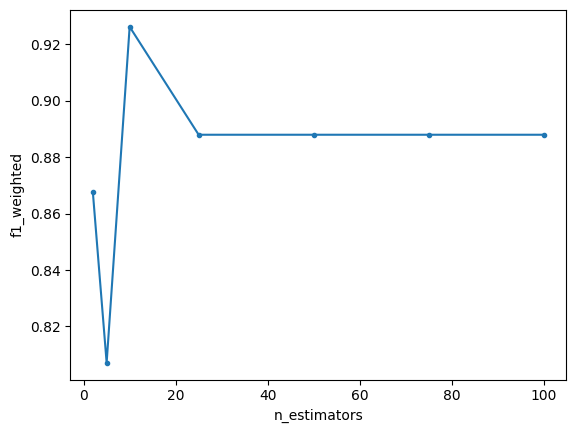

In [21]:
# test the effect of n_estimators on performance
n_estimators = [2, 5, 10, 25, 50, 75, 100]
f1_weighted = []
for item in n_estimators:
    clf = AdaBoostClassifier(
        n_estimators = item,
        random_state = 0
    )
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1_weighted.append(f1_score(y_test, y_pred, average = 'weighted'))

plt.figure()
plt.plot(n_estimators, f1_weighted, '.-')
plt.xlabel('n_estimators')
plt.ylabel('f1_weighted')
plt.show()

- If `n_estimators` is too low
    - There won't be enough weak learners in the ensemble to correct the high bias.
    - The ensemble might be to simple and underfit the data.
- If `n_estimators` is too high
    - Increase `n_estimator` have a diminishing effect on performance
    - Too many weak learners might lead to over-fitting, which down-grades the performance
    - More estimators increase the training time and require more computational resource
- We can select an optimal value of `n_estimators` through hyper-parameter tuning

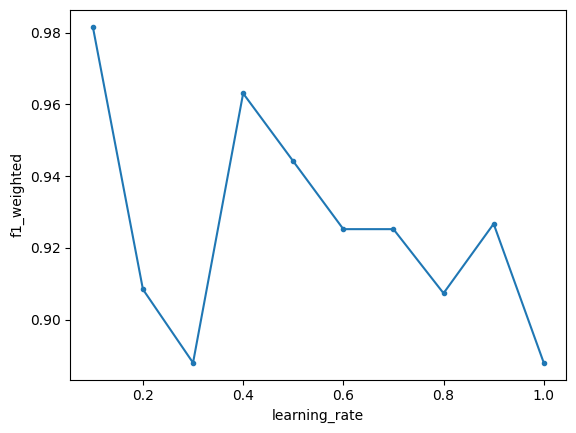

In [22]:
# test the effect of learning_rate on performance
learning_rate = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
f1_weighted = []
for item in learning_rate:
    clf = AdaBoostClassifier(
        learning_rate = item,
        random_state = 0
    )
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1_weighted.append(f1_score(y_test, y_pred, average = 'weighted'))

plt.figure()
plt.plot(learning_rate, f1_weighted, '.-')
plt.xlabel('learning_rate')
plt.ylabel('f1_weighted')
plt.show()

- If `learning_rate` is too low
    - A low `learning_rate` makes the ensemble more conservative, requiring more estimators to achieve good performance.
    - In general, a low `learning_rate` with enough weak learners can lead to a robust ensemble with good performance.
- If `learning_rate` is too high
    - A high `learning_rate` allows each weak learner to contribute more to the final ensemble.
    - This can speed up training process and reduce the number of required weak learners.
    - But it also increase the risk of over-fitting, which might not be able to obtain the best performance.
- We can make the trade-off between `learning_rate` and `n_estimators` through hyper-parameter tuning

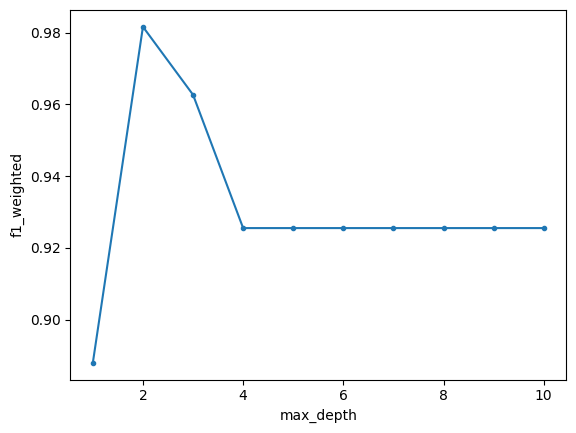

In [23]:
# test the effect of the complexity of base estimators on performance
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
f1_weighted = []
for item in max_depth:
    clf = AdaBoostClassifier(
        estimator = DecisionTreeClassifier(max_depth = item),
        random_state = 0
    )
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1_weighted.append(f1_score(y_test, y_pred, average = 'weighted'))

plt.figure()
plt.plot(max_depth, f1_weighted, '.-')
plt.xlabel('max_depth')
plt.ylabel('f1_weighted')
plt.show()

- If `max_depth` of the base tree is too low
    - The base tree might be too simple, and the resulting ensemble is also too simple for complex problems
- If `max_depth` of the base tree is too high
    - The base tree is too complex with low bias and high variance
    - Cannot meet the prerequistes of Boosting method
    - Might be over-fitted and the performance can be down-graded
- We should select a low `max_depth` to keep the base tree shallow

In [24]:
clf = AdaBoostClassifier(
    estimator = DecisionTreeClassifier(max_depth = 2),
    learning_rate = 0.1,
    random_state = 0, # set random state to 0 for reproduciblity
)

# fit the model to the training dataset
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        22
           2       0.93      1.00      0.96        13

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [25]:
# obtain feature importances
feature_importances = pd.Series(
    data = clf.feature_importances_,
    index = feature_df.columns
)
feature_importances

alcohol                         0.137490
malic_acid                      0.000000
ash                             0.000000
alcalinity_of_ash               0.000000
magnesium                       0.063189
total_phenols                   0.275355
flavanoids                      0.210041
nonflavanoid_phenols            0.000000
proanthocyanins                 0.000000
color_intensity                 0.100941
hue                             0.022223
od280/od315_of_diluted_wines    0.012918
proline                         0.177843
dtype: float64

## Part 2. Gradient Boosting Classifier

In this part, we will using Gradient Boosting algorithm to solve the same problem.

We will execute the following steps:

- Build a Gradient Boosting classifier with default hyper-parameters
    - Implement early stopping or not
- Obtain the byproduct feature importance
- Test the effects of hyper-parameters on performance
- Hyper-parameter tuning through cross-validation

### 2.1 Build and evaluate a classifier using Gradient Boosting

Build and evaluate a multi-class classifier using Gradient Boosting with default hyper-parameters.

- `learning_rate = 0.1`
- `n_estimators = 100`
- `max_depth = 3`

In [26]:
# create the Gradient Boosting classifier with default hyper-parameters
clf = GradientBoostingClassifier(
    n_iter_no_change = 5, # set to None to unable early stopping
    random_state = 0, # set random state to 0 for reproduciblity
    verbose = 3 # set the verbose level for printing progress and performance
)

In [27]:
# fit the model to the training dataset
clf.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.9014            0.33s
         2           0.7570            0.23s
         3           0.6417            0.19s
         4           0.5477            0.17s
         5           0.4699            0.15s
         6           0.4048            0.14s
         7           0.3499            0.14s
         8           0.3033            0.13s
         9           0.2631            0.13s
        10           0.2283            0.12s
        11           0.1984            0.12s
        12           0.1727            0.12s
        13           0.1504            0.11s
        14           0.1313            0.11s
        15           0.1146            0.11s
        16           0.1002            0.11s
        17           0.0876            0.11s
        18           0.0769            0.10s
        19           0.0673            0.10s
        20           0.0590            0.10s
        21           0.0519            0.10s
        2

GradientBoostingClassifier(n_iter_no_change=5, random_state=0, verbose=3)

In [28]:
# predict categories for test dataset
y_pred = clf.predict(X_test)

In [29]:
# obtain classification metrics using `classification_report`
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.95      0.95      0.95        22
           2       0.93      1.00      0.96        13

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.96      0.96      0.96        54



### 2.2 Obtain feature importances

As `GradientBoostingClassifier()` is also tree-based, we can obtain the feature importance as a by product.

In [30]:
# obtain feature importances
feature_importances = pd.Series(
    data = clf.feature_importances_,
    index = feature_df.columns
)
feature_importances

alcohol                         0.004425
malic_acid                      0.036692
ash                             0.011056
alcalinity_of_ash               0.000060
magnesium                       0.011026
total_phenols                   0.000546
flavanoids                      0.062223
nonflavanoid_phenols            0.008329
proanthocyanins                 0.000062
color_intensity                 0.309028
hue                             0.000113
od280/od315_of_diluted_wines    0.267128
proline                         0.289313
dtype: float64

We can see there is no zero value in the feature importance.

This is because the default depth of the base tree in `GradientBoostingClassifier()` is 3, thus more features involved than using the decision stump.

### 2.3 Test with other hyper-parameter values

The three key hyper-parameters will affect the performance of the ensemble.

Let's test these effects by varying one hyper-parameter and keeping the rest unchanged.

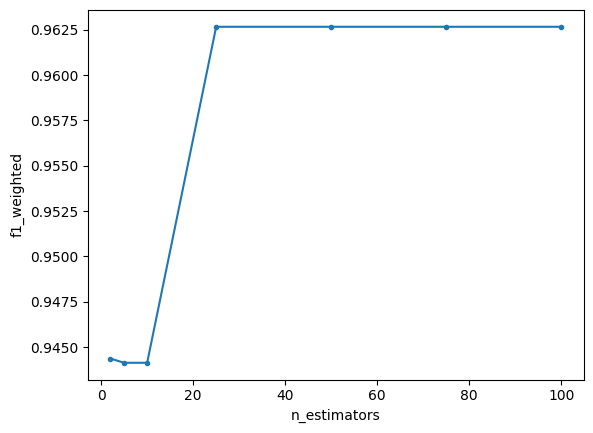

In [34]:
# test the effect of n_estimators on performance
n_estimators = [2, 5, 10, 25, 50, 75, 100]
f1_weighted = []
for item in n_estimators:
    clf = GradientBoostingClassifier(
        n_estimators = item,
        random_state = 0
    )
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1_weighted.append(f1_score(y_test, y_pred, average = 'weighted'))

plt.figure()
plt.plot(n_estimators, f1_weighted, '.-')
plt.xlabel('n_estimators')
plt.ylabel('f1_weighted')
plt.show()

- If `n_estimators` is too low
    - There won't be enough weak learners in the ensemble to correct the remaining residuals.
    - The ensemble might be to simple and underfit the data.
- If `n_estimators` is too high
    - Gradient Boosting is fairly robust to over-fitting, a large number usually won't downgrade the performance.
    - However, too many estimators will increase the training time and require more computational resources.
    - We can use early stopping to prevent the ensemble from over-fitting and save training time.
- We can select an optimal value of `n_estimators` through hyper-parameter tuning
- Or we can set `n_estimators` to a large value and adopt early stopping at the same time

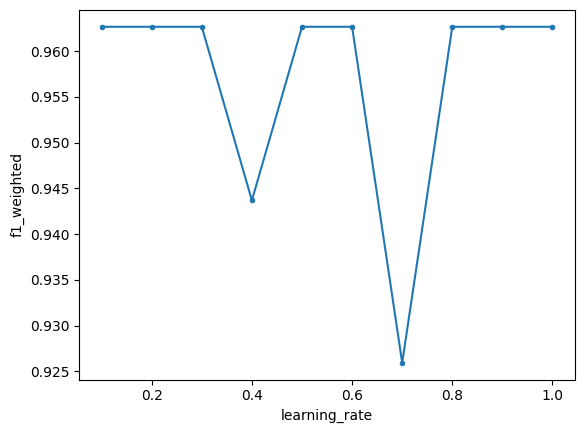

In [35]:
# test the effect of learning_rate on performance
learning_rate = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
f1_weighted = []
for item in learning_rate:
    clf = GradientBoostingClassifier(
        learning_rate = item,
        random_state = 0
    )
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1_weighted.append(f1_score(y_test, y_pred, average = 'weighted'))

plt.figure()
plt.plot(learning_rate, f1_weighted, '.-')
plt.xlabel('learning_rate')
plt.ylabel('f1_weighted')
plt.show()

- If `learning_rate` is too low
    - A low `learning_rate` makes the ensemble more conservative, requiring more estimators to achieve good performance.
    - In general, a low `learning_rate` with enough weak learners can lead to a robust ensemble with good performance.
- If `learning_rate` is too high
    - A high `learning_rate` allows each weak learner to contribute more to the final ensemble.
    - This can speed up training process and reduce the number of required weak learners.
- We can make a trade-off between `learning_rate` and `n_estimators`.

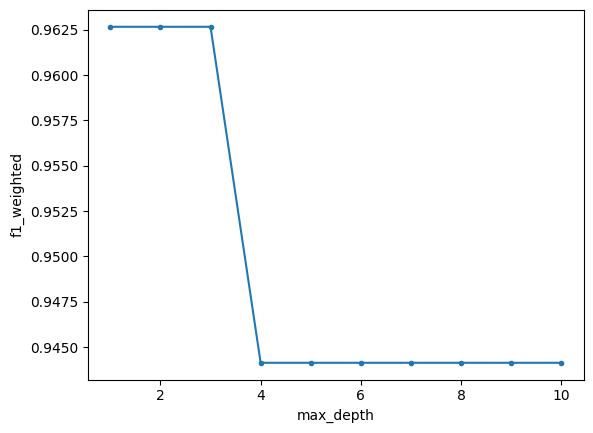

In [36]:
# test the effect of the complexity of base estimators on performance
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
f1_weighted = []
for item in max_depth:
    clf = GradientBoostingClassifier(
        max_depth = item,
        random_state = 0
    )
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1_weighted.append(f1_score(y_test, y_pred, average = 'weighted'))

plt.figure()
plt.plot(max_depth, f1_weighted, '.-')
plt.xlabel('max_depth')
plt.ylabel('f1_weighted')
plt.show()

- The best depth depends on the specific dataset, as well as the interaction of the input features.
- There is no clear pattern that smaller numbers are better or larger numbers are better.
- Gradient Boosting doesn't require the base tree to be shallow.
- We can select a proper `max_depth` for a specific problem through hyper-parameter tuning.

### 2.4 Hyper-parameter tuning through cross-validation

Considering the interaction between `n_estimators`, `learning_rate`, `max_depth`, and whether to adopt early stopping or not, we can use hyper-parameter tuning to find the best combination of the hyper-parameter values.

In [37]:
# define the hyper-parameters to search
param_dict = {
    'learning_rate': [1e-2, 1e-1, 1.0, 1e1, 1e2],
    'n_estimators': [10, 50, 100, 200, 500],
    'max_depth': [1, 3, 5, 7, 9, None],
    'n_iter_no_change': [None, 1, 5, 10]
}

In [38]:
# hyper-parameter tuning through cross-validation
grid_clf = GridSearchCV(
    estimator = GradientBoostingClassifier(random_state = 0),
    param_grid = param_dict,
    scoring = 'f1_weighted',
    refit = True,
    cv = 5,
    verbose = 1,
    n_jobs = -1
)
grid_clf.fit(X_train, y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0, 10.0, 100.0],
                         'max_depth': [1, 3, 5, 7, 9, None],
                         'n_estimators': [10, 50, 100, 200, 500],
                         'n_iter_no_change': [None, 1, 5, 10]},
             scoring='f1_weighted', verbose=1)

In [39]:
# obtain the best hyper-parameters and the best score
print('Best hyper-parameters:', grid_clf.best_params_)
print('Best score:', grid_clf.best_score_)

Best hyper-parameters: {'learning_rate': 1.0, 'max_depth': 1, 'n_estimators': 10, 'n_iter_no_change': None}
Best score: 0.9597688338493292


In [40]:
# predict categories for test dataset
y_pred = grid_clf.predict(X_test)

In [41]:
# obtain classification metrics using `classification_report`
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.91      0.95        22
           2       0.93      1.00      0.96        13

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



## Part 3. Stacking Classifier

In this part, we will using Stacking algorithm to solve the same problem.

We will ececute the following steps:

- Declare the base estimators
- Train the stacking classifer
- Evaluate the stacking classifer

### 3.1 Declare base estimators

To be noted, the base estimators can be built using different algorithms, or the same algorithm with different hyper-parameters.

For some algorithms that require the specific data pre-processing steps, like feature scaling for KNN and SVM, don't forget to embed the pre-processing steps as a pipeline.

In [42]:
# declare a list of base estimators to be stacked together
estimators = [
    ('decision tree', DecisionTreeClassifier(
        max_depth = 5,
        random_state = 0
    )),
    ('KNN', Pipeline([
        ('standard scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ])),
    ('SVC', Pipeline([
        ('standard scaler', StandardScaler()),
        ('svc', SVC())
    ]))
]

### 3.2 Build the stacked classifier

Here, we use the default algorithm (logistic regression) as the meta learner.

In [43]:
# create the stacked classifier with logistic regression as the final estimator
clf = StackingClassifier(
    estimators = estimators,
    final_estimator = LogisticRegression(),
    n_jobs = -1,
    verbose = 10
)

In [44]:
# fit the model to the training dataset
clf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


StackingClassifier(estimators=[('decision tree',
                                DecisionTreeClassifier(max_depth=5,
                                                       random_state=0)),
                               ('KNN',
                                Pipeline(steps=[('standard scaler',
                                                 StandardScaler()),
                                                ('knn',
                                                 KNeighborsClassifier())])),
                               ('SVC',
                                Pipeline(steps=[('standard scaler',
                                                 StandardScaler()),
                                                ('svc', SVC())]))],
                   final_estimator=LogisticRegression(), n_jobs=-1, verbose=10)

### 3.3 Evaluation using the test dataset

In [45]:
# predict categories for test dataset
y_pred = clf.predict(X_test)

In [46]:
# obtain classification metrics using `classification_report`
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        13

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



## Part 4. Hands-on exercise

In this exercise, you are required to build a regression model using the three ensemble learning methods we've learned today.

The problem to be solved is predicting the price of flights.

Please download the flight price dataset from Learn.

<span style="color:red">**[TBC]**</span> Please complete the following tasks:

- Load and pre-process the dataset
- Build and evaluate a regression model using:
    - AdaBoost
    - Gradient Boosting
    - Stacking

<span style="color:red">**Warning**</span>: Be aware of the size of the dataset, make sure:

- The scripts are executable on your device (whether your computer or Google Colab)
- The submitted jupyter notebook has been already executed and contains all the outputs.

### Task 1. Load and pre-process the dataset

You need to load the dataset and perform necessary pre-processing steps.

<span style="color:red">**[TBC]**</span> Please complete the following tasks:

- Load the dataset
- Encode categorical features
- Train test split

In [47]:
# [TBC] complete your code here with proper comments
# load the dataset
# hint: pandas.read_csv()
df = pd.read_csv('flight_price_dataset.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [48]:
df.nunique()


Unnamed: 0          300153
airline                  6
flight                1561
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
class                    2
duration               476
days_left               49
price                12157
dtype: int64

In [49]:
# [TBC] complete your code here with proper comments
# Encode categorical features
categorical_columns = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

print("\nUnique values after encoding:")
for column in categorical_columns:
    print(f"{column}: {df[column].unique()}")


Unique values after encoding:
airline: [4 0 5 2 3 1]
flight: [1408 1387 1213 ...  558  587  718]
source_city: [2 5 0 4 3 1]
departure_time: [2 1 4 0 5 3]
stops: [2 0 1]
arrival_time: [5 4 1 0 2 3]
destination_city: [5 0 4 3 1 2]
class: [1 0]


In [50]:
# [TBC] complete your code here with proper comments
# Train test split
# hint: sklearn.model_selection.train_test_split()
# hint: first divide the encoded dataset into features and target, then perform train test split

feature_df = df.drop(columns = ['price','Unnamed: 0'])
target_df = df['price']
X_train, X_test, y_train, y_test = train_test_split(
    feature_df.values, # call `.values` to convert the feature from pd.DataFrame to np.array
    target_df.values, # call `.values` to convert the target from pd.Series to np.array
    train_size = 0.7, # 70% for training, 30% for test
    shuffle = True, # shuffle the samples before splitting
    random_state = 0 # controls the shuffling, set to zero for reproduciblility
)

### Task 2. AdaBoost Regressor

You need to build and evaluate a regression model using AdaBoost algorithm.

<span style="color:red">**[TBC]**</span> Please complete the following tasks:

- Hyper-parameter-tuning through cross validation
- Evaluate the performance on test dataset
    - Calculate RMSE and R2 score
    - Visualize the prediction results of the test dataset

In [ ]:
# [TBC] complete your code here with proper comments
# AdaBoost Regressor
clf = AdaBoostRegressor(
    random_state = 0, # set random state to 0 for reproduciblity
)
clf.fit(X_train, y_train)

Mean Squared Error: 38820820.0776445
R2 Score: 0.9246862715277165


In [ ]:
y_pred = clf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print("R2 Score:", r2_score(y_test, y_pred))

In [56]:
# define the hyper-parameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'loss': ['linear', 'square', 'exponential']
}

# hyper-parameter tuning through cross-validation
grid_search = GridSearchCV(
    estimator=AdaBoostRegressor(random_state=0),
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# fit the model to the training dataset
grid_search.fit(X_train, y_train)

# obtain the best hyper-parameters and the best score
print('Best hyper-parameters:', grid_search.best_params_)
print('Best score:', -grid_search.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/Users/germanesteban/Library/Mobile Documents/com~apple~CloudDocs/Documents/Master Data Analitics/Machine Learning/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/germanesteban/Library/Mobile Documents/com~apple~CloudDocs/Documents/Master Data Analitics/Machine Learning/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/germanesteban/Library/Mobile Documents/com~apple~CloudDocs/Documents/Master Data Analitics/Machine Learning/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^

Best hyper-parameters: {'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 50}
Best score: nan


In [ ]:
# predict categories for test dataset
y_pred = grid_search.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# evaluate the performance on test dataset
print("Mean Squared Error:", round(mean_squared_error(y_test, y_pred),3))
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print("R2 Score:", round(r2_score(y_test, y_pred),5))

Mean Squared Error: 33234673.835
R2 Score: 0.93552
Root Mean Squared Error (RMSE): 5764.952
Mean Absolute Error (MAE): 3492.151


In [ ]:
plt.figure(figsize = (8, 5))
plt.scatter(y_test, y_pred, color = 'blue')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('True Price vs Predicted Price')
plt.show()

### Task 3. Gradient Boosting Regressor

You need to build and evaluate a regression model using Gradient Boosting algorithm.

<span style="color:red">**[TBC]**</span> Please complete the following tasks:

- Hyper-parameter-tuning through cross validation
- Evaluate the performance on test dataset
    - Calculate RMSE and R2 score
    - Visualize the prediction results of the test dataset

In [63]:
# [TBC] complete your code here with proper comments
# Gradient Boosting Regressor
# create the Gradient Boosting classifier with default hyper-parameters
clf = GradientBoostingRegressor(
    n_iter_no_change = 5, # set to None to unable early stopping
    random_state = 0, # set random state to 0 for reproduciblity
    verbose = 3, # set the verbose level for printing progress and performance 
)
clf.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1   423799414.2058            9.77s
         2   349633823.5791            9.11s
         3   289555017.7293            8.80s
         4   240867407.8996            8.53s
         5   201403434.0363            8.39s
         6   169419640.3153            8.29s
         7   143467892.5936            8.18s
         8   122433729.8147            8.09s
         9   105358160.4856            8.00s
        10    91482751.4586            7.89s
        11    80205770.4282            7.77s
        12    71028648.3838            7.66s
        13    63561657.7452            7.55s
        14    57465211.0932            7.45s
        15    52497568.5638            7.35s
        16    48442261.0108            7.25s
        17    44979033.3238            7.16s
        18    42083394.8055            7.08s
        19    39798932.4667            7.00s
        20    37922868.0888            6.92s
        21    36332074.9175            6.84s
        2

GradientBoostingRegressor(n_iter_no_change=5, random_state=0, verbose=3)

In [ ]:
# predict categories for test dataset
y_pred = clf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# evaluate the performance on test dataset
print("Mean Squared Error:", round(mean_squared_error(y_test, y_pred),3))
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print("R2 Score:", round(r2_score(y_test, y_pred),5))

Mean Squared Error: 21818170.541
R2 Score: 0.95767
Root Mean Squared Error (RMSE): 4670.992
Mean Absolute Error (MAE): 2789.253


In [67]:
# define the hyper-parameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

# hyper-parameter tuning through cross-validation
grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=0),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# fit the model to the training dataset
grid_search.fit(X_train, y_train)

# obtain the best hyper-parameters and the best score
print('Best hyper-parameters:', grid_search.best_params_)
print('Best score:', -grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyper-parameters: {'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 200}
Best score: 5717886.099828234


In [68]:
# predict categories for test dataset
y_pred = grid_search.predict(X_test)

# evaluate the performance on test dataset
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", round(mean_squared_error(y_test, y_pred), 3))
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print("R2 Score:", round(r2_score(y_test, y_pred), 5))

Mean Squared Error: 5337862.415
Root Mean Squared Error (RMSE): 2310.381
Mean Absolute Error (MAE): 1230.514
R2 Score: 0.98964


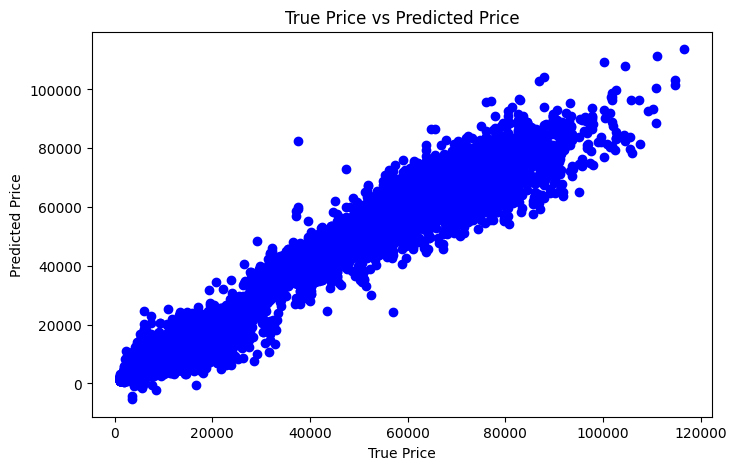

In [69]:
plt.figure(figsize = (8, 5))
plt.scatter(y_test, y_pred, color = 'blue')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('True Price vs Predicted Price')
plt.show()

### Task 4. Stacking Regressor

You need to build and evaluate a regression model using Stacking algorithm.

<span style="color:red">**[TBC]**</span> Please complete the following tasks:

- Train a stacking regressor on training dataset
    - Select a list of base learner
        - Choose proper regression algorithms
        - If the algorithm needs specific pre-processing steps, embed the steps as a pipeline
    - Select the meta-learner
        - Choose proper regression algorithm
- Evaluate the performance on test dataset
    - Calculate RMSE and R2 score
    - Visualize the prediction results of the test dataset

In [8]:
# [TBC] complete your code here with proper comments
# Stacking Regressor
# Initialize the Stacking Regressor

# Define base learners
base_learners = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

# Define the meta-learner
meta_learner = LinearRegression()

In [30]:
# Initialize the Stacking Regressor
stacking_regressor = StackingRegressor(estimators=base_learners, final_estimator=meta_learner)

# Train the Stacking Regressor
stacking_regressor.fit(X_train, y_train)

StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                              ('gb',
                               GradientBoostingRegressor(random_state=42))],
                  final_estimator=LinearRegression())

Root Mean Squared Error (RMSE): 0.191
R2 Score: 0.937


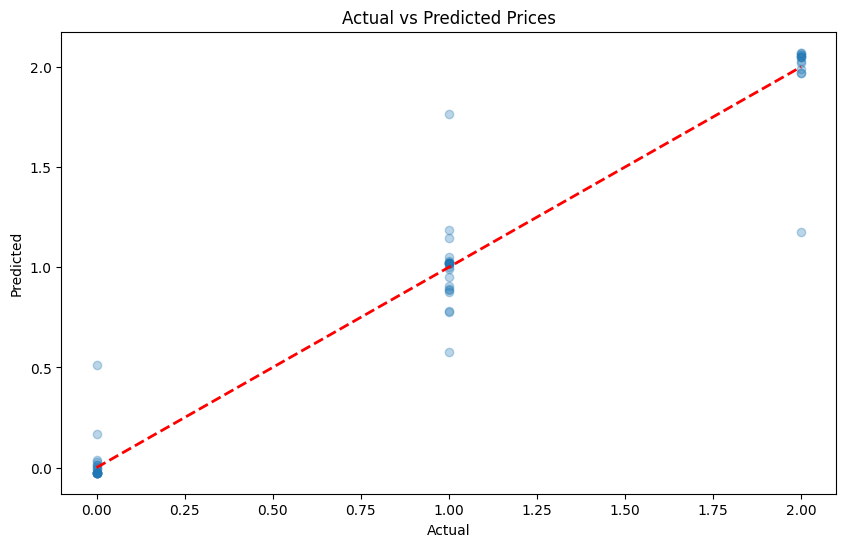

In [31]:
# Make predictions
y_pred = stacking_regressor.predict(X_test)

# Calculate RMSE and R2 score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print RMSE and R2 score with 3 decimal places
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R2 Score: {r2:.3f}")

# Visualize the prediction results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Prices')
plt.show()